In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [4]:
df.duplicated().any()

False

In [5]:
obj_cols=[]
for i in df.columns:
    if(df[i].dtypes=='object'):
        obj_cols.append(i)
obj_cols

['Undergrad', 'Marital.Status', 'Urban']

In [7]:
int_cols=[]
for i in df.columns:
    if(df[i].dtypes=='int64'):
        int_cols.append(i)
int_cols

['Taxable.Income', 'City.Population', 'Work.Experience']

In [11]:
for i in obj_cols:
    print(df[i].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64


Taxable.Income


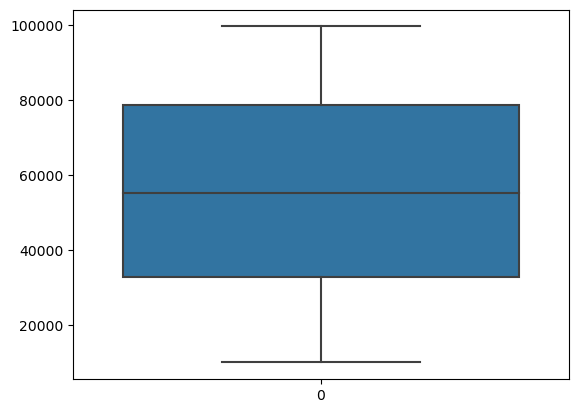

City.Population


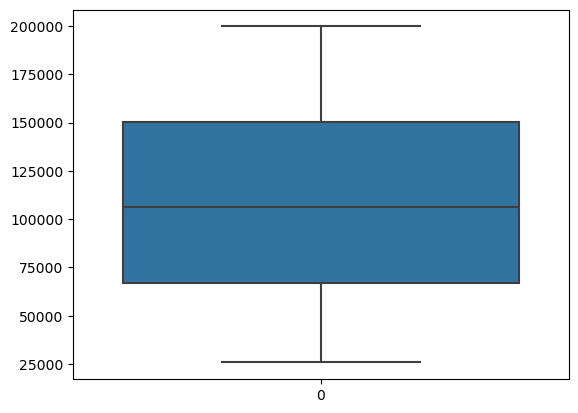

Work.Experience


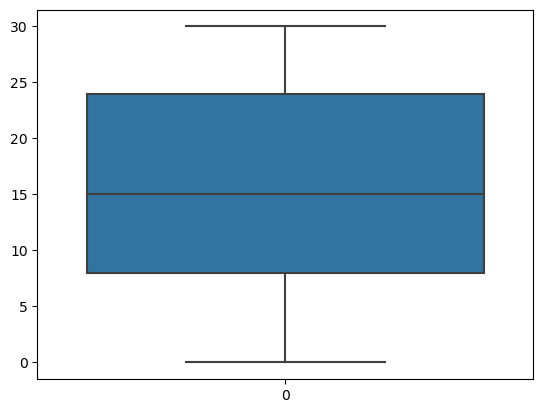

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in int_cols:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [14]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_10124\2673118318.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


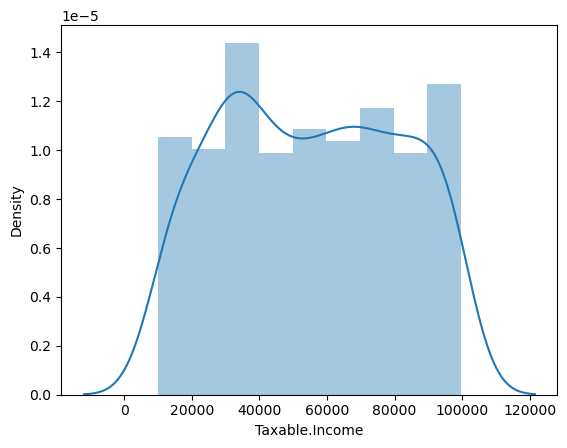

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_10124\2673118318.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


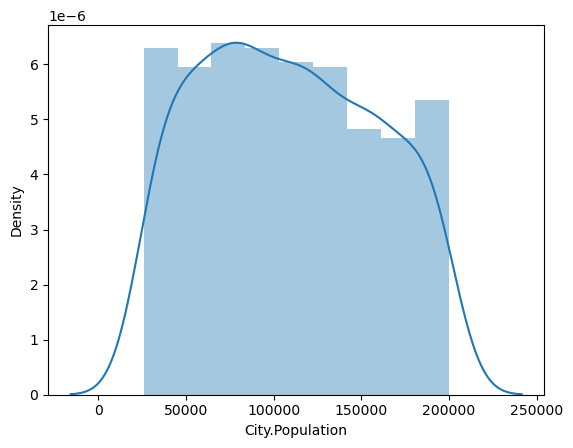

C:\Users\Muhammed Rasmil\AppData\Local\Temp\ipykernel_10124\2673118318.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


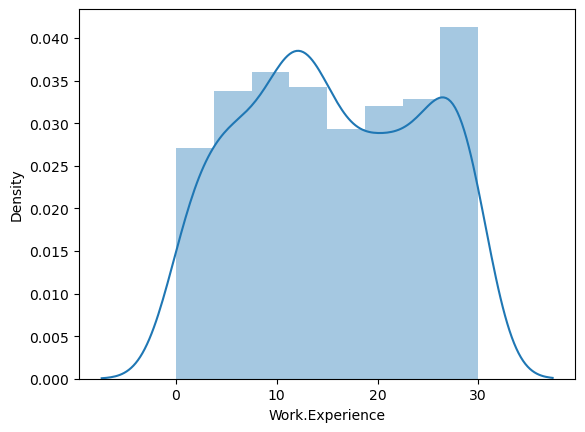

In [16]:
for i in int_cols:
    sns.distplot(df[i])
    plt.show()

In [20]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Undergrad         600 non-null    object  
 1   Marital.Status    600 non-null    object  
 2   Taxable.Income    600 non-null    int64   
 3   City.Population   600 non-null    int64   
 4   Work.Experience   600 non-null    int64   
 5   Urban             600 non-null    object  
 6   taxable_category  600 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 29.0+ KB


In [22]:
obj_cols=[]
for i in df1.columns:
    if(df1[i].dtypes!='int64'):
        obj_cols.append(i)
obj_cols

['Undergrad', 'Marital.Status', 'Urban', 'taxable_category']

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
for i in obj_cols:
    df1[i]=le.fit_transform(df1[i])
df1.sample(6)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
295,1,1,52912,40089,10,0,0
440,0,2,77312,170407,13,1,0
347,0,1,16082,80991,0,1,1
134,1,1,35832,190365,28,0,0
498,1,2,67936,164924,24,1,0
383,1,1,97453,148246,5,1,0


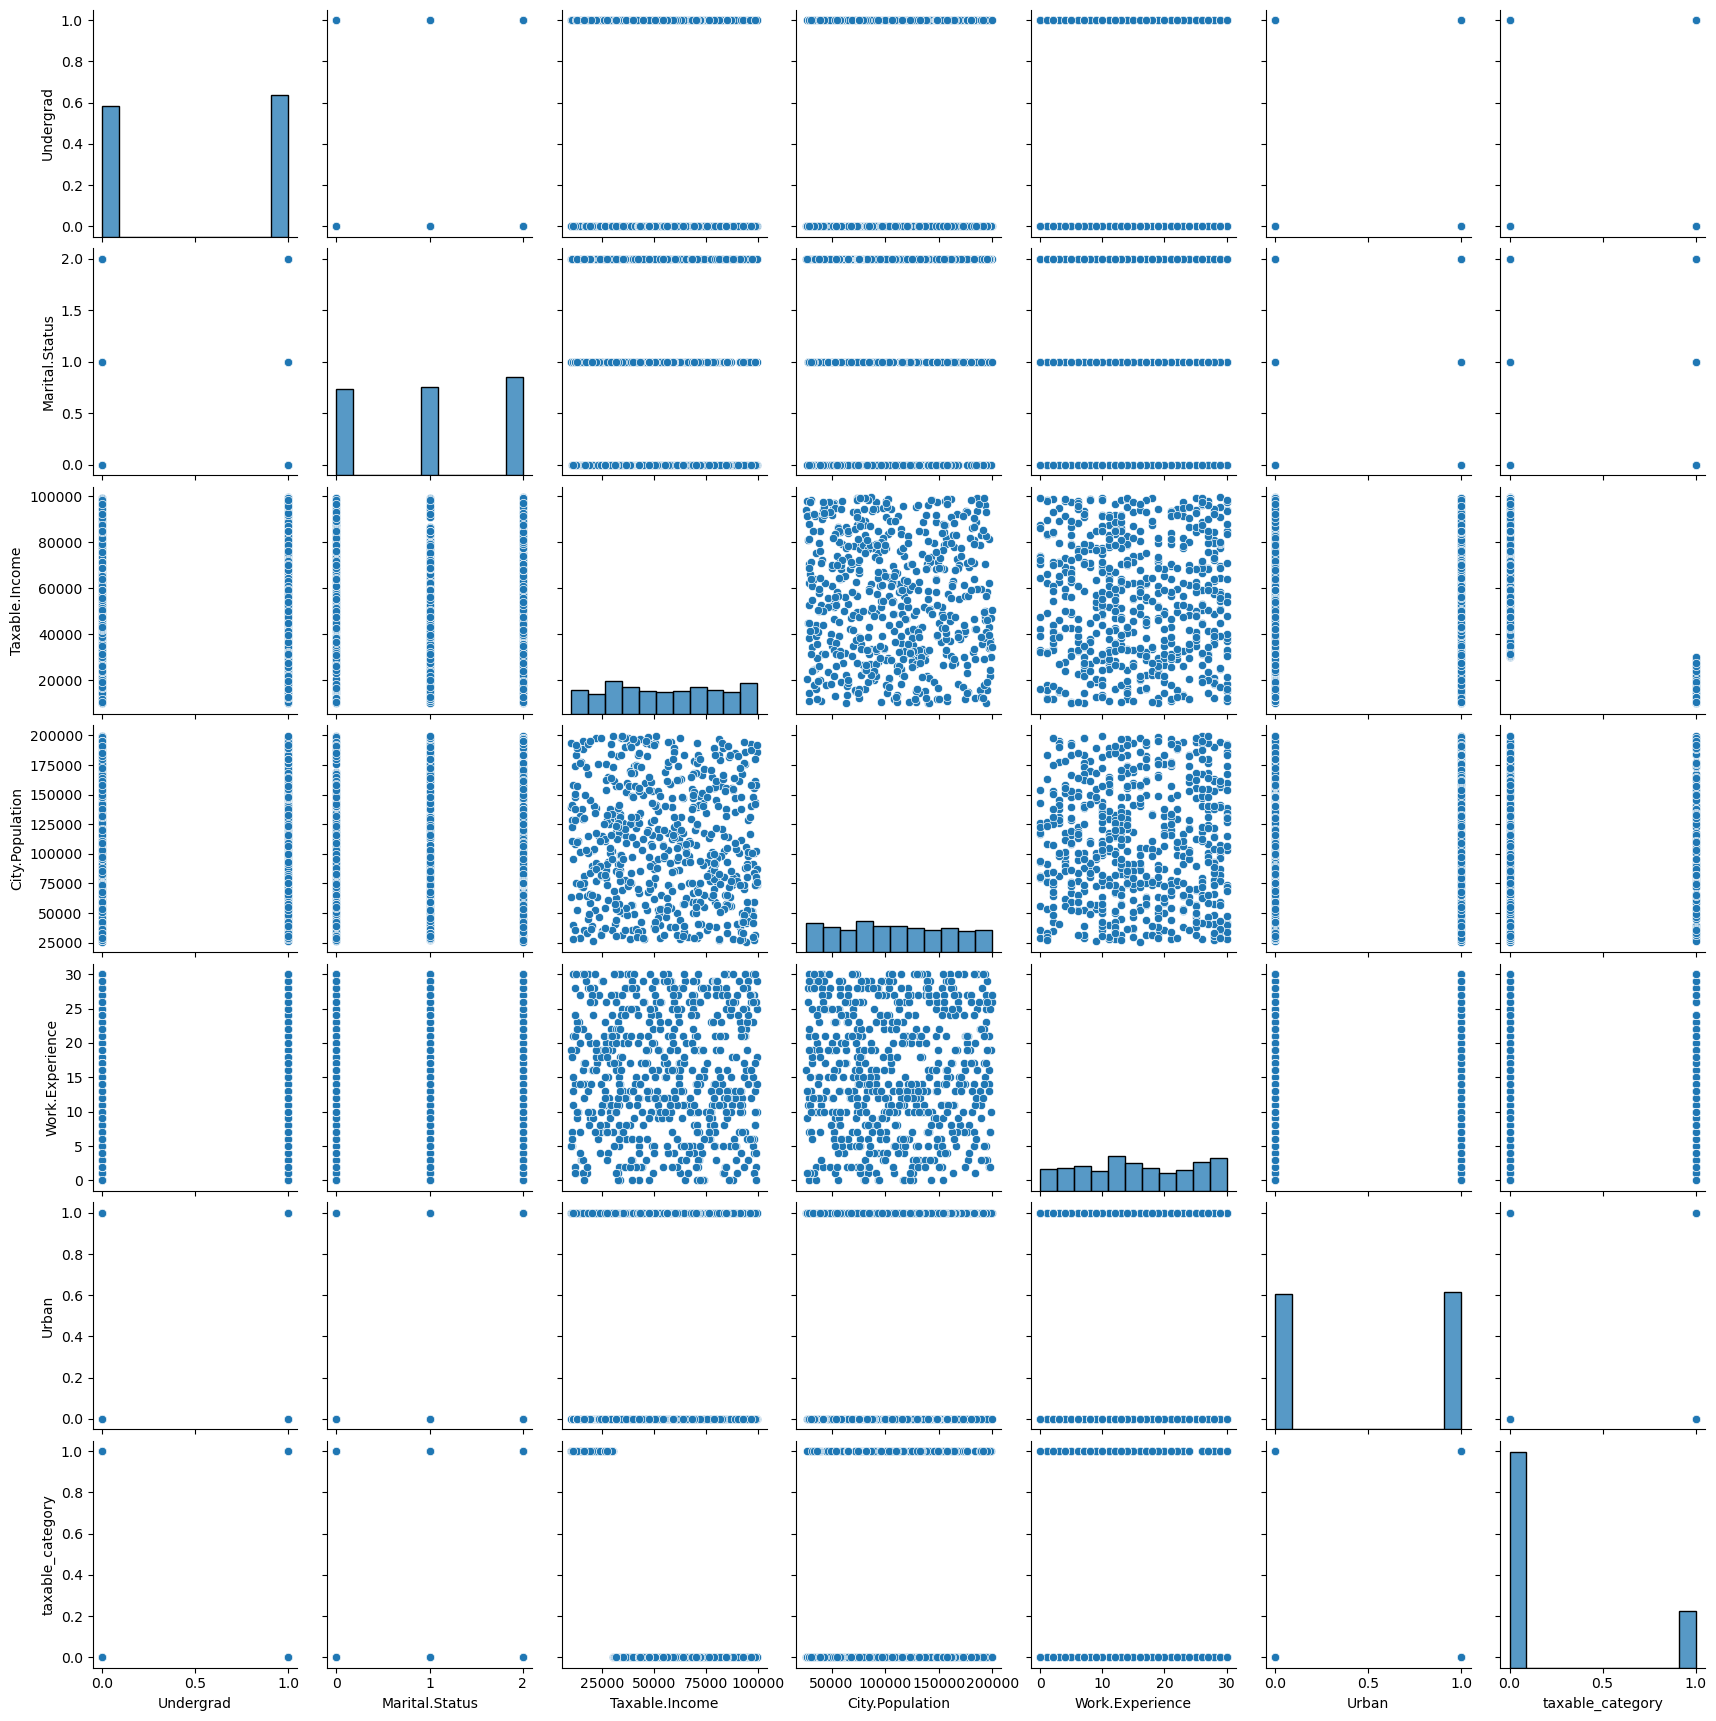

In [28]:
sns.pairplot(df1)
plt.show()

In [29]:
df1.taxable_category.value_counts()

0    476
1    124
Name: taxable_category, dtype: int64

In [30]:
df1.shape

(600, 7)

In [34]:
df2=df1.drop('Taxable.Income',axis=1)
df2.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,taxable_category
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [35]:
X=df2.drop('taxable_category',axis=1)
X.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [37]:
y=df2['taxable_category']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: taxable_category, dtype: int32

In [31]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=100)

In [39]:
from sklearn.preprocessing import RobustScaler
scalar=RobustScaler()

In [40]:
X_train.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
598,1,1,180083,17,0
154,0,2,82520,29,1
302,1,0,97109,27,0
222,1,0,168248,27,0
589,1,1,30774,10,0


In [41]:
X_train=pd.DataFrame(scalar.fit_transform(X_train))
X_test=pd.DataFrame(scalar.fit_transform(X_test))

In [42]:
X_train.head()

,0,1,2,3,4
0,0.0,0.0,0.826382,0.140351,-1.0
1,-1.0,0.5,-0.282550,0.982456,0.0
2,0.0,-0.5,-0.116726,0.842105,-1.0
3,0.0,-0.5,0.691862,0.842105,-1.0
4,0.0,0.0,-0.870711,-0.350877,-1.0


In [43]:
X_test.head()

,0,1,2,3,4
0,0.0,0.5,0.060012,-0.529412,1.0
1,-1.0,-0.5,-0.412414,0.705882,0.0
2,-1.0,-0.5,0.452075,-0.235294,1.0
3,0.0,-0.5,1.206630,-0.117647,0.0
4,-1.0,-0.5,-0.117742,-0.058824,1.0


In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
model=RandomForestClassifier()

In [46]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
model.score(X_test,y_test)

0.7833333333333333

In [48]:
y_pred=model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        96
           1       0.25      0.04      0.07        24

    accuracy                           0.78       120
   macro avg       0.53      0.51      0.47       120
weighted avg       0.69      0.78      0.72       120



In [56]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [51]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [60]:
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

C:\Users\Muhammed Rasmil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Muhammed Rasmil\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Muhammed Rasmil\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Muhammed Rasmil\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [61]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [62]:
rsv.best_score_

0.7916666666666666

In [63]:
model_new=RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=4,max_features='sqrt')

In [64]:
model_new.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200)

In [65]:
model_new.score(X_test,y_test)

0.8

In [66]:
y_pred_new=model.predict(X_test)

In [67]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        96
           1       0.25      0.04      0.07        24

    accuracy                           0.78       120
   macro avg       0.53      0.51      0.47       120
weighted avg       0.69      0.78      0.72       120



In [69]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_new)

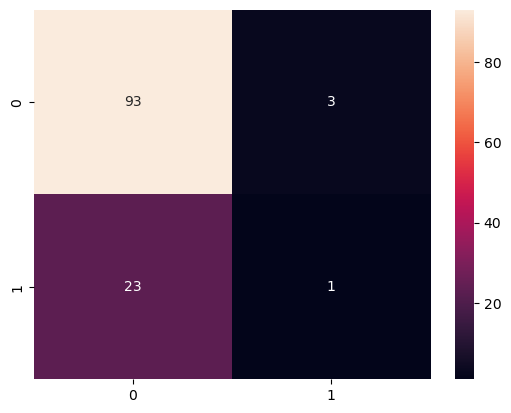

In [72]:
sns.heatmap(cm,annot=True)
plt.show()